Daniil Abbruzzese
Github username: Daniilab
USC ID: 4721123667

In [32]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import chardet
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV


# 1 - Decision Trees as Interpretable Models

## 1 (a)



In [4]:
column_names = ['temp', 'nausea', 'lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning_urethra', 'inflammation_UB', 'nephritis_rp_origin']

# Replace 'your_file.data' with the actual path to your .data file
file_path = '../data/diagnosis.data'

In [5]:

# Define a function to handle splitting lines based on both tabs and spaces
def custom_split(line):
    # Split by tabs first
    tab_split = line.split('\t')
    
    # Then split by spaces
    space_split = [item.split() for item in tab_split]
    
    # Flatten the list
    flattened_list = [item for sublist in space_split for item in sublist]
    
    return flattened_list


In [6]:


# Detect the file's encoding
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']

# Now, use the detected encoding to read the file
with open(file_path, 'r', encoding=encoding) as f:
    lines = f.readlines()

# Process the data
data = [custom_split(line.strip()) for line in lines]

# Convert commas to decimals
data = [[float(item.replace(',', '.')) if ',' in item else item for item in row] for row in data]

# Convert to DataFrame using given column names
df = pd.DataFrame(data, columns=column_names)

df

temp nausea lumbar_pain urine_pushing micturition_pains burning_urethra  \
0    35.5     no         yes            no                no              no   
1    35.9     no          no           yes               yes             yes   
2    35.9     no         yes            no                no              no   
3    36.0     no          no           yes               yes             yes   
4    36.0     no         yes            no                no              no   
..    ...    ...         ...           ...               ...             ...   
115  41.4     no         yes           yes                no             yes   
116  41.5     no          no            no                no              no   
117  41.5    yes         yes            no               yes              no   
118  41.5     no         yes           yes                no             yes   
119  41.5     no         yes           yes                no             yes   

    inflammation_UB nephritis_rp_origin  
0                no                  no  
1               yes                  no  
2                no                  no  
3               yes                  no  
4                no                  no  
..              ...                 ...  
115              no                 yes  
116              no                  no  
117              no                 yes  
118              no                 yes  
119              no                 yes  

[120 rows x 8 columns]

# 1 (b)

In [7]:

# Convert categorical columns into numeric values
for col in ['nausea', 'lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning_urethra', 'inflammation_UB', 'nephritis_rp_origin']:
    df[col] = df[col].astype('category').cat.codes

# Create a combined target column for multi-class classification
df['combined_target'] = df['inflammation_UB'] + df['nephritis_rp_origin'] * 2

X = df.drop(columns=['inflammation_UB', 'nephritis_rp_origin', 'combined_target'])
y = df['combined_target']

df


temp  nausea  lumbar_pain  urine_pushing  micturition_pains  \
0    35.5       0            1              0                  0   
1    35.9       0            0              1                  1   
2    35.9       0            1              0                  0   
3    36.0       0            0              1                  1   
4    36.0       0            1              0                  0   
..    ...     ...          ...            ...                ...   
115  41.4       0            1              1                  0   
116  41.5       0            0              0                  0   
117  41.5       1            1              0                  1   
118  41.5       0            1              1                  0   
119  41.5       0            1              1                  0   

     burning_urethra  inflammation_UB  nephritis_rp_origin  combined_target  
0                  0                0                    0                0  
1                  1                1                    0                1  
2                  0                0                    0                0  
3                  1                1                    0                1  
4                  0                0                    0                0  
..               ...              ...                  ...              ...  
115                1                0                    1                2  
116                0                0                    0                0  
117                0                0                    1                2  
118                1                0                    1                2  
119                1                0                    1                2  

[120 rows x 9 columns]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

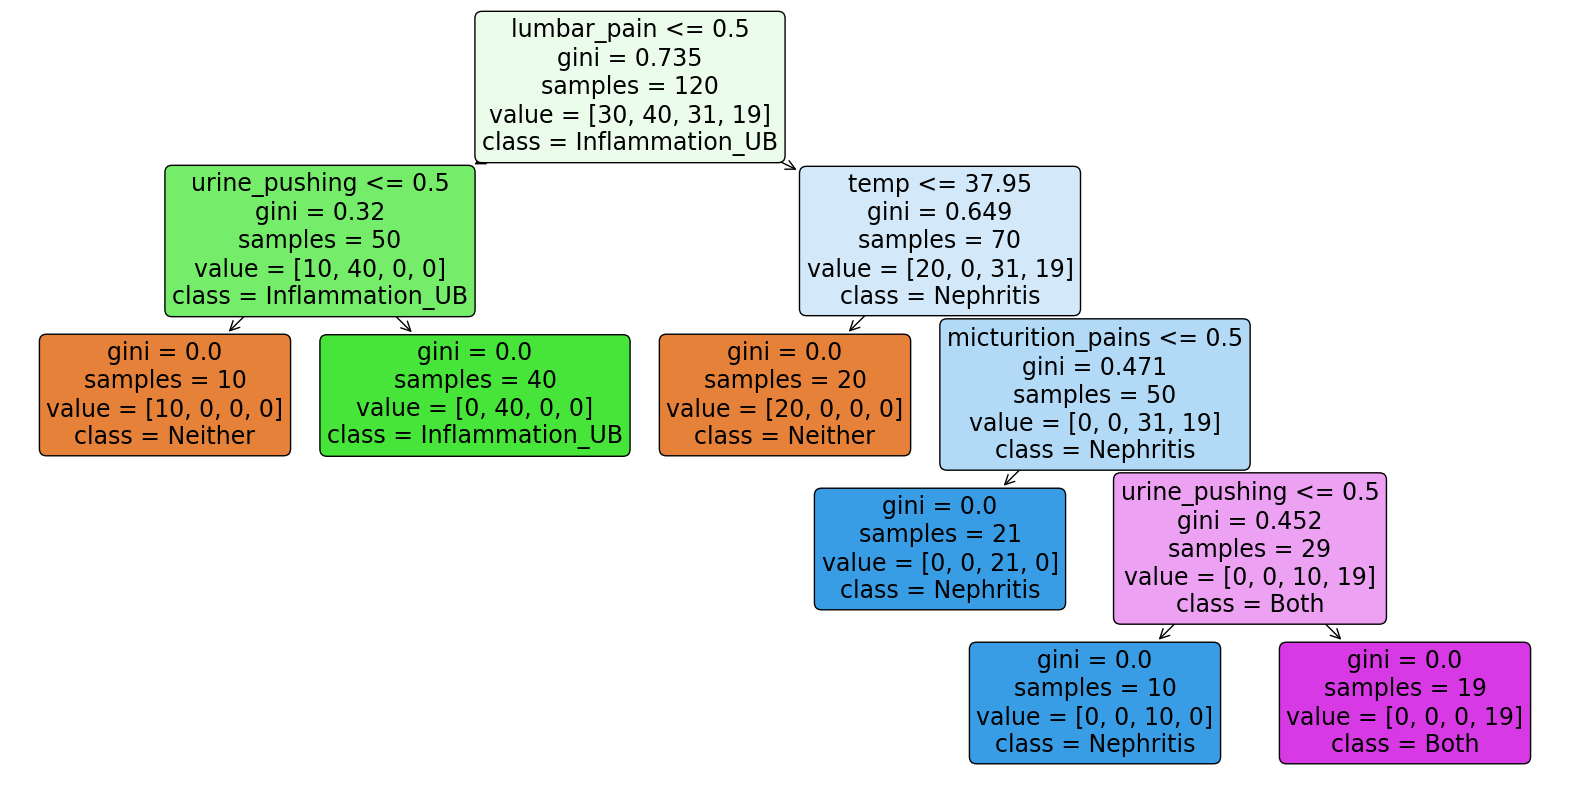

In [8]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Neither", "Inflammation_UB", "Nephritis", "Both"], rounded=True)
plt.show()

#  1 (c)

- IF lumbar_pain is NO AND urine_pushing is NO THEN the class is Neither.
- IF lumbar_pain is NO AND urine_pushing is YES THEN the class is Inflammation_UB.

- IF lumbar_pain is YES AND temp is <= 37.95 THEN the class is Neither.
- IF lumbar_pain is YES AND temp is > 37.95 AND nausea is NO THEN the class is Nephritis.
- IF lumbar_pain is YES AND temp is > 37.95 AND nausea is YES and urine_pushing is NO THEN the class is Nephritis.
- IF lumbar_pain is YES AND temp is > 37.95 AND nausea is YES and urine_pushing is YES THEN the class is Both.


# 1 (d)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

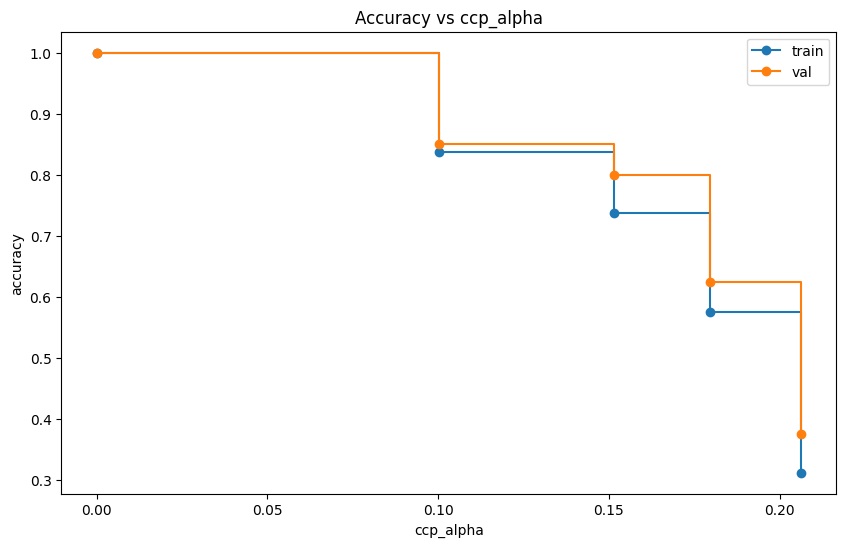

In [9]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)


# Initialize and train a decision tree
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)


# creating a bunch object to store the different alphas that result in each step of pruning along with the total impurities for each alpha
path = clf.cost_complexity_pruning_path(X_train, y_train)

#extracting just the alphas 
ccp_alphas = path.ccp_alphas

#For each value of ccp_alpha, train a decision tree and evaluate its performance on the validation set.

clfs = []
train_scores = []
val_scores = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
    train_scores.append(accuracy_score(y_train, clf.predict(X_train)))
    val_scores.append(accuracy_score(y_val, clf.predict(X_val)))



plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
plt.plot(ccp_alphas, val_scores, marker='o', label="val", drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs ccp_alpha")
plt.legend()
plt.show()



### As shown above, when alpha is set to 0 then model is most accurate. 

In [10]:
print(ccp_alphas)

print(f'when alpha = {ccp_alphas[1]}, the validation accuracy is {val_scores[1]}')


[0.         0.10036765 0.15151515 0.17958385 0.2062907 ]
when alpha = 0.10036764705882353, the validation accuracy is 0.85


### Description: To get a simpler, more interpretable model, I will have to use alpha = 0.10036764705882353. However, at the cost of this, the model's validation accuracy decreases from 1 to 0.85 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py

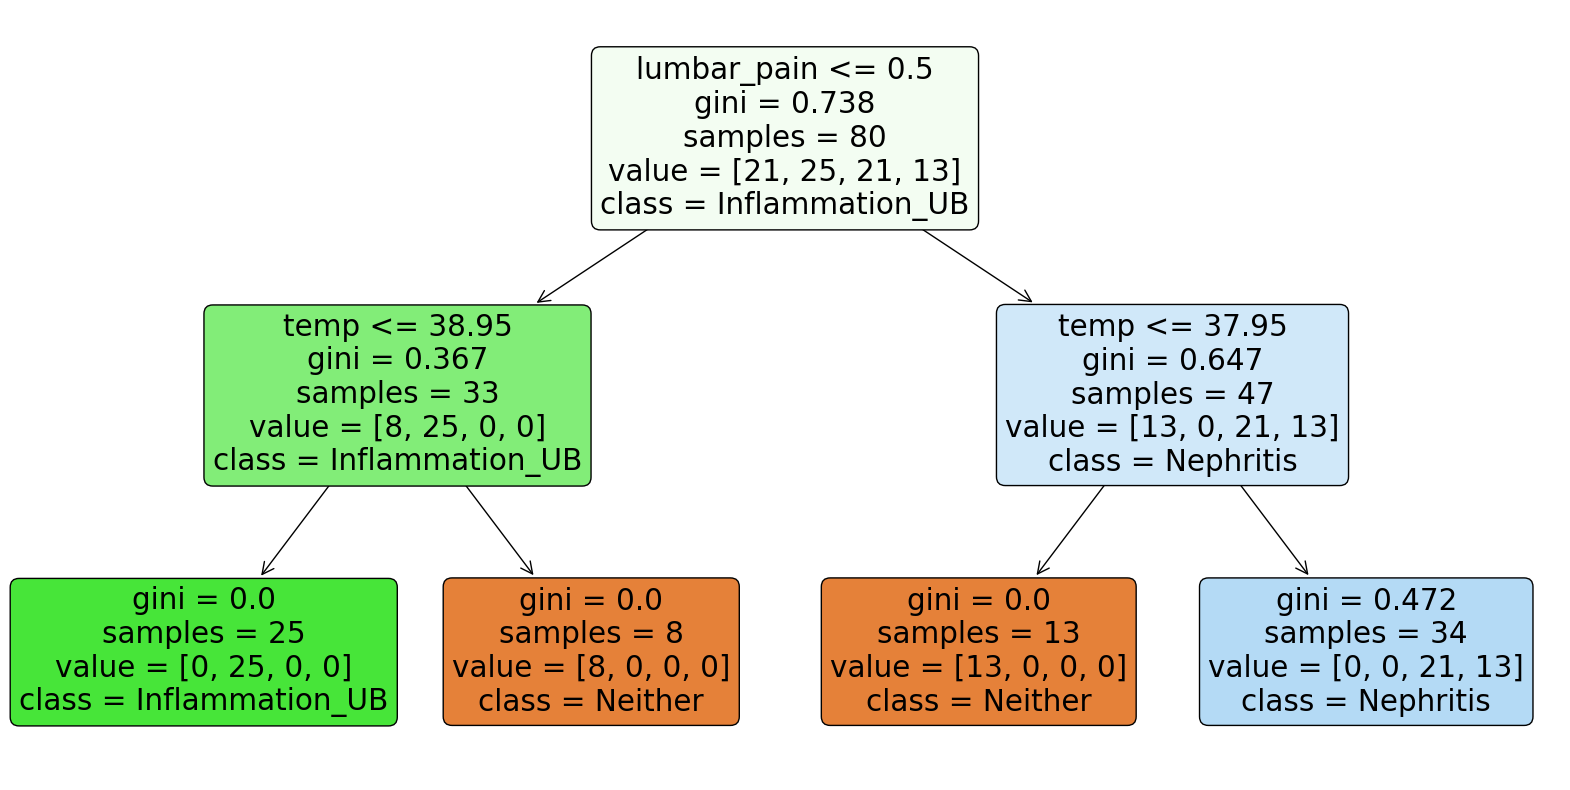

In [11]:
#plotting more interpretable, less accurate model

# Train the decision tree
clf_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=0.10036764705882353)
clf_pruned.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(clf_pruned, filled=True, feature_names=X.columns, class_names=["Neither", "Inflammation_UB", "Nephritis", "Both"], rounded=True)
plt.show()

# 2 (a)

Download the Communities and Crime data
3
from
https://archive.ics.uci.
edu/ml/datasets/Communities+and+Crime
. Use the first 1495 rows of data as
the training set and the rest as the test set.

In [43]:
df_communities = pd.read_csv('../data/communities.data', header = None)

# grabbing the feature names

# Read the "communities.names" file line by line.
with open('../data/communities.names', 'r') as f:
    lines = f.readlines()

# For each line, check if it starts with `--` and extract the word before the colon.
column_names = []
for line in lines:
    if line.strip().startswith("@attribute"):
        # Split by colon and take the first part, then split by space and take the second word
        name = line.split()[1]
        column_names.append(name)


df_communities.columns = column_names

df_communities_train_1 = df_communities.iloc[:1495]

df_communities_test_1 = df_communities.iloc[1495:]

df_communities_train_1

state county community        communityname  fold  population  \
0         8      ?         ?         Lakewoodcity     1        0.19   
1        53      ?         ?          Tukwilacity     1        0.00   
2        24      ?         ?         Aberdeentown     1        0.00   
3        34      5     81440  Willingborotownship     1        0.04   
4        42     95      6096    Bethlehemtownship     1        0.01   
...     ...    ...       ...                  ...   ...         ...   
1490      6      ?         ?     Hillsboroughtown     8        0.00   
1491      6      ?         ?           Orangecity     8        0.16   
1492     13      ?         ?         Waycrosscity     8        0.01   
1493     39     85     49056           Mentorcity     8        0.06   
1494     34     17     79610      WestNewYorktown     8        0.05   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1490           0.59          0.01          0.69          1.00  ...      0.02   
1491           0.62          0.03          0.74          0.48  ...      0.07   
1492           0.36          0.95          0.24          0.03  ...      0.03   
1493           0.53          0.01          0.98          0.05  ...      0.08   
1494           0.43          0.08          0.65          0.12  ...      0.00   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                  0.9   
1        0.12            0.45          ?              ?                    ?   
2        0.21            0.02          ?              ?                    ?   
3        0.39            0.28          ?              ?                    ?   
4        0.09            0.02          ?              ?                    ?   
...       ...             ...        ...            ...                  ...   
1490     0.14            0.22          ?              ?                    ?   
1491     0.40            0.14       0.07           0.05                 0.85   
1492     0.12            0.01          ?              ?                    ?   
1493     0.15            0.02          ?              ?                    ?   
1494     1.00            1.00          0           0.01                 0.77   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                       ?                 0.00                ?   
2                       ?                 0.00                ?   
3                       ?                 0.00                ?   
4                       ?                 0.00                ?   
...                   ...                  ...              ...   
1490                    ?                 0.00                ?   
1491                  0.5                 0.61             0.19   
1492                    ?                 0.00                ?   
1493                    ?                 0.00                ?   
1494                    0                 0.51             0.18   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1490                 0.03  
1491                 0.20  
1492                 0.30  
1493                 0.03  
1494                 0.23  

[1495 rows x 128 columns]

# 2 (b)

The data set has missing values. Use a data imputation technique to deal with
the missing values in the data set. The data description mentions some features
are nonpredictive. Ignore those features.

In [44]:

# Drop unnecessary columns
df_communities_train_1 = df_communities.drop(columns=['state', 'county', 'community', 'communityname', 'fold'])
df_communities_test_1 = df_communities.drop(columns=['state', 'county', 'community', 'communityname', 'fold'])

# Replace '?' with NaN
df_communities_train_1.replace('?', np.nan, inplace=True)
df_communities_test_1.replace('?', np.nan, inplace=True)

# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer on the training data
imputer.fit(df_communities_train_1)

# Transform both the training and test data with the fitted imputer
df_train_imputed = pd.DataFrame(imputer.transform(df_communities_train_1), columns=df_communities_train_1.columns)
df_test_imputed = pd.DataFrame(imputer.transform(df_communities_test_1), columns=df_communities_test_1.columns)



# 2 (c)


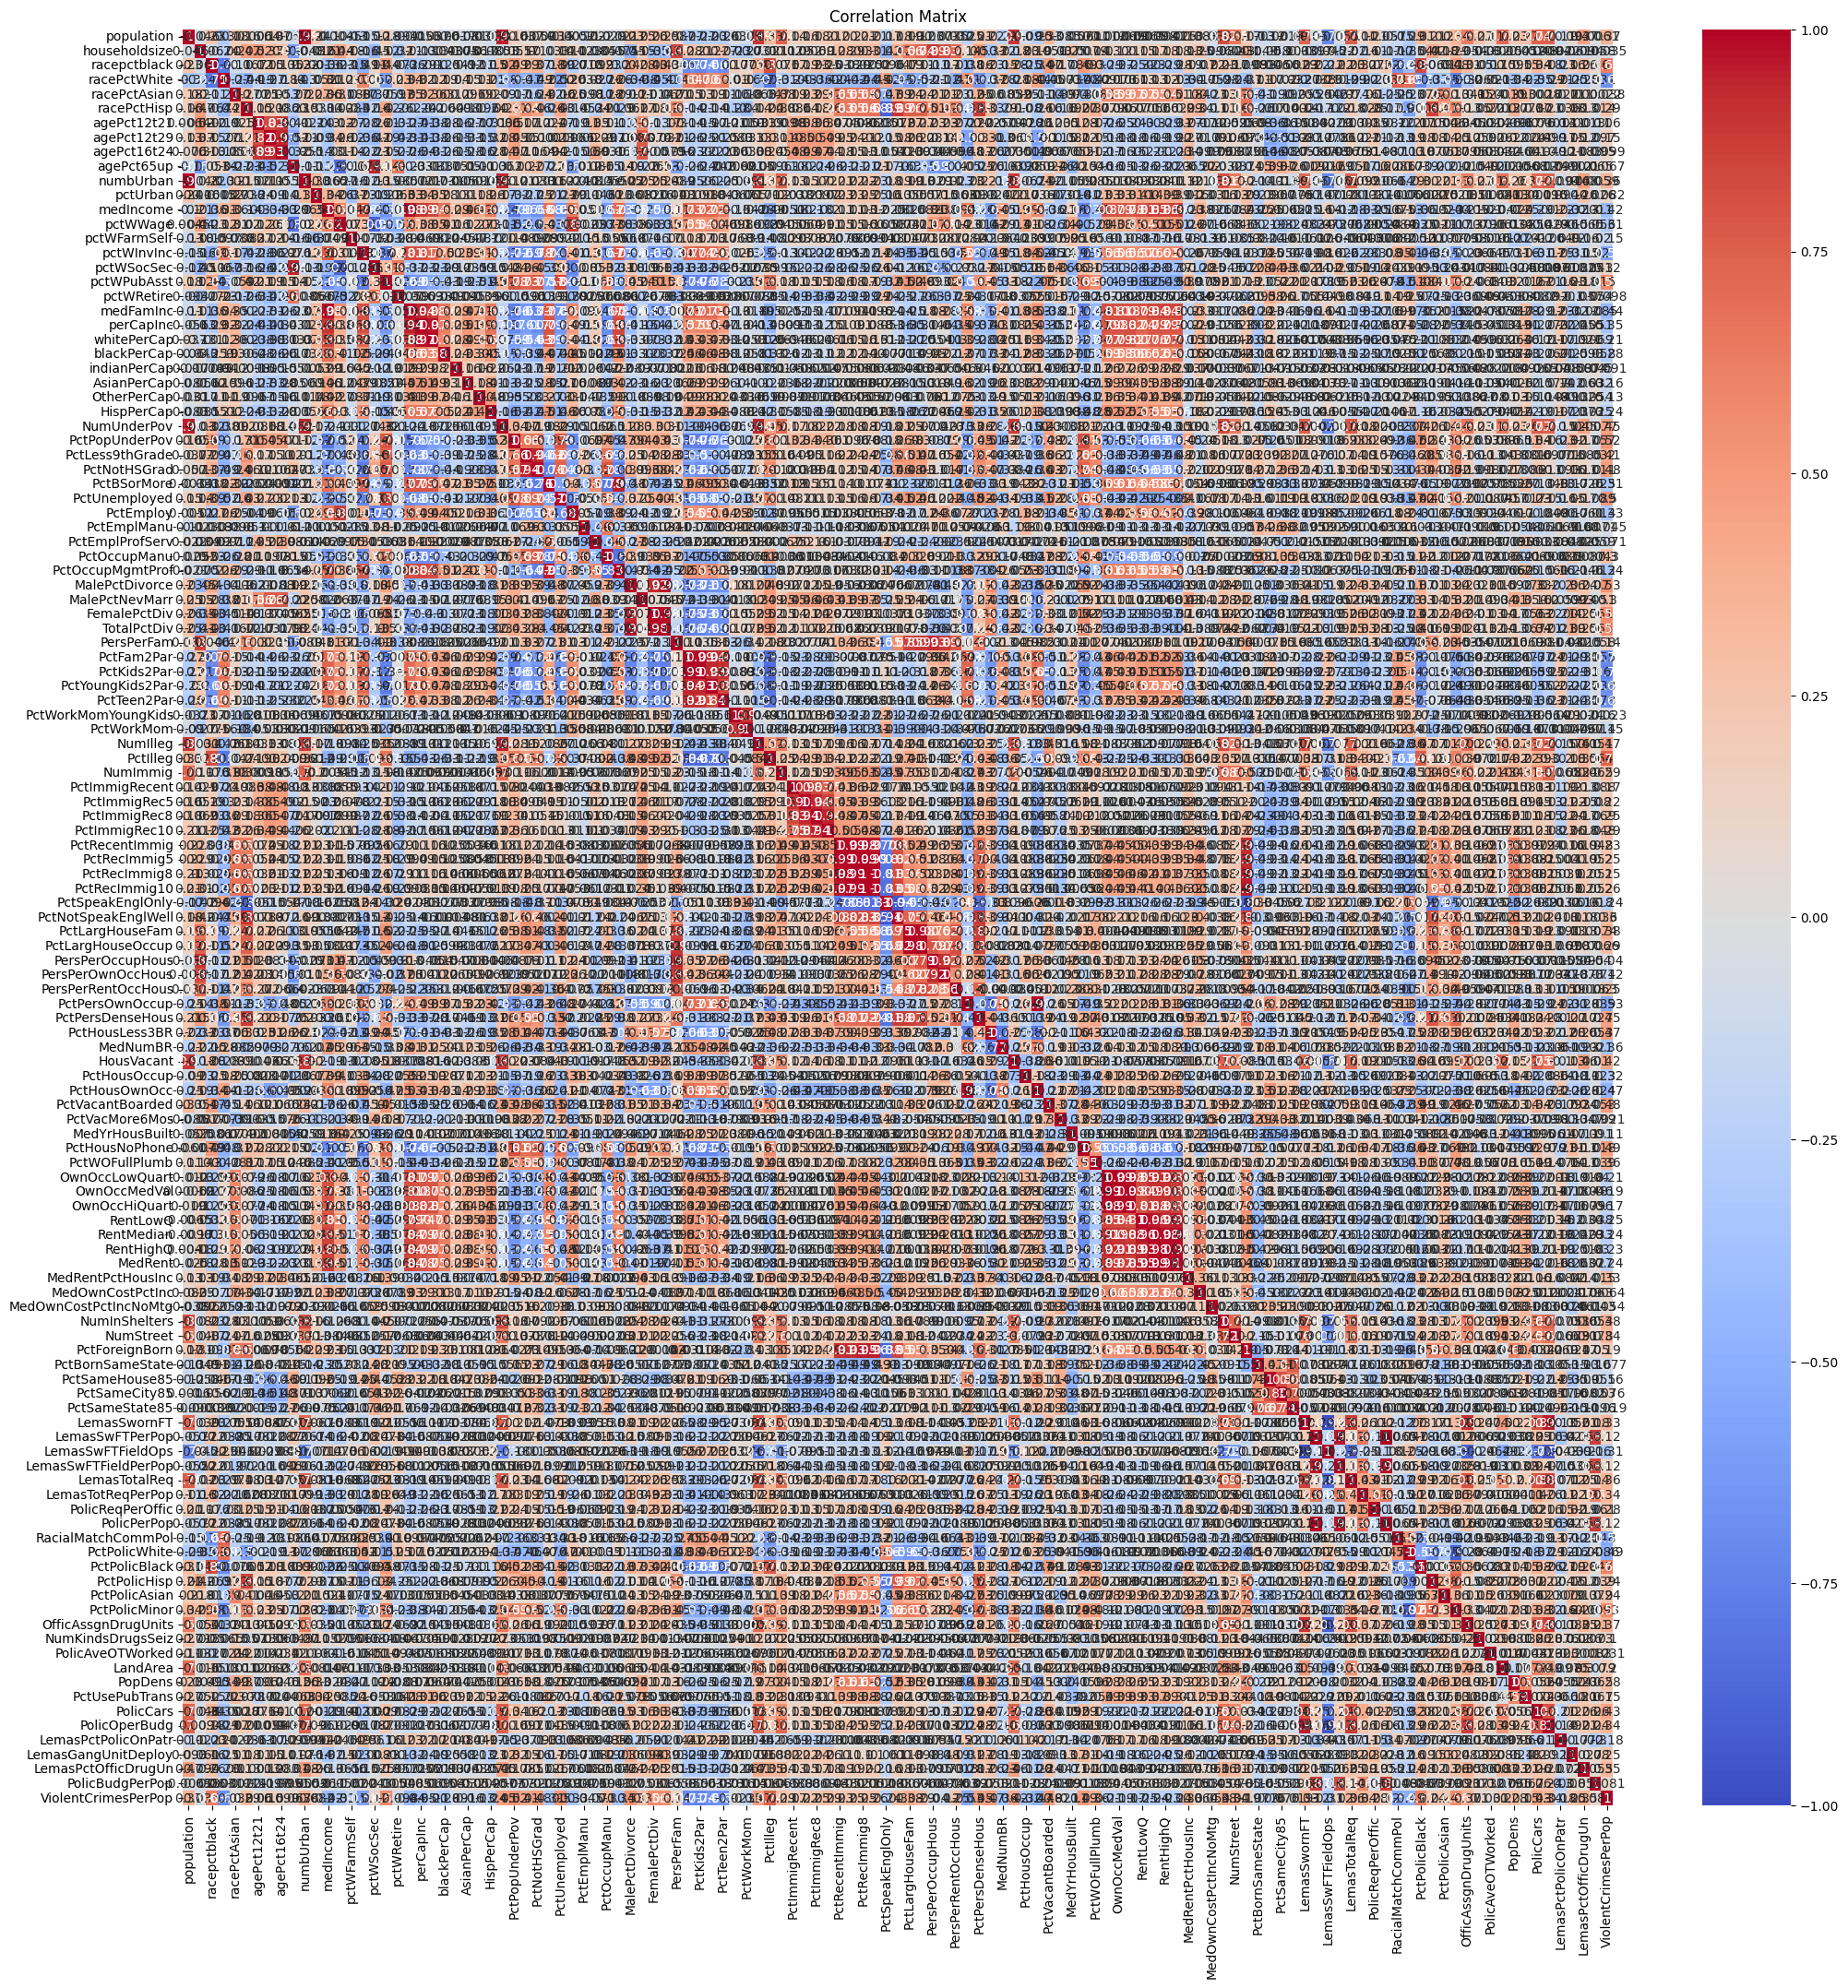

In [47]:
df_imputed = pd.concat([df_train_imputed, df_test_imputed], ignore_index=True)


# Calculate the correlation matrix
corr = df_imputed.corr()

# Plot the heatmap
plt.figure(figsize=(25,25))  # Set the figure size
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix')
plt.show()


# 2 (d)

- Calculate the Coefficient of Variation
CV
for each feature, where
CV
=
s
m
, in
which
s
is sample standard deviation and
m
is sample mean

In [48]:
# Calculate CV for each feature
cv = df_imputed.std() / df_imputed.mean()

cv

population             2.203226
householdsize          0.353254
racepctblack           1.410743
racePctWhite           0.323741
racePctAsian           1.358992
                         ...   
LemasPctPolicOnPatr    0.163751
LemasGangUnitDeploy    0.642885
LemasPctOfficDrugUn    2.554946
PolicBudgPerPop        0.527740
ViolentCrimesPerPop    0.978892
Length: 123, dtype: float64

# 2(e)

Pick 11 features with highest CV and make scatter plots and box plots for
them. Can you draw conclusions about significance of those features, just by the
scatter plots?

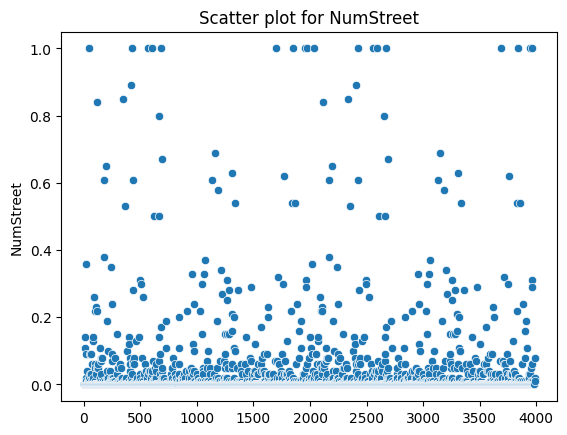

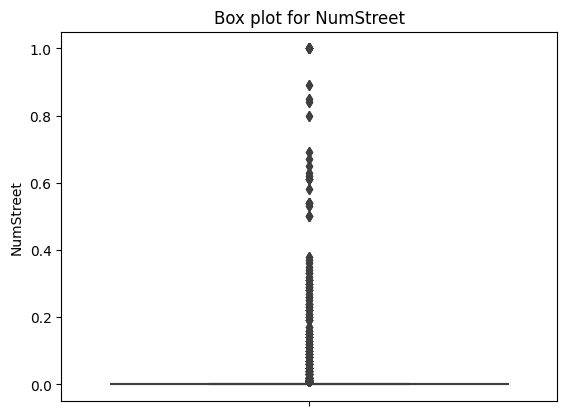

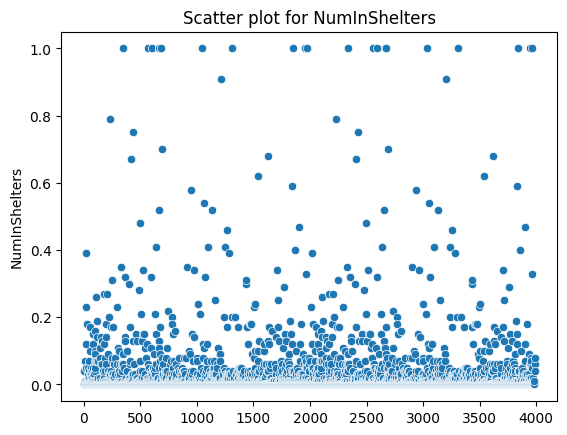

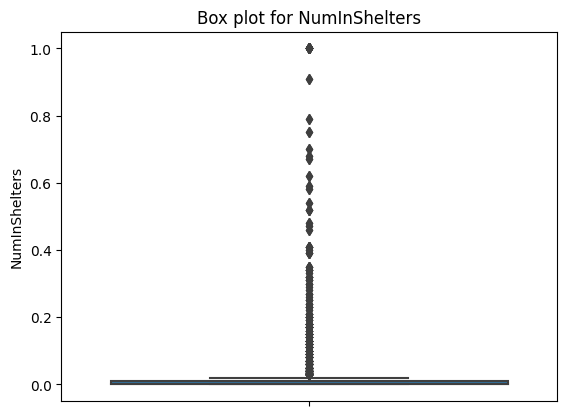

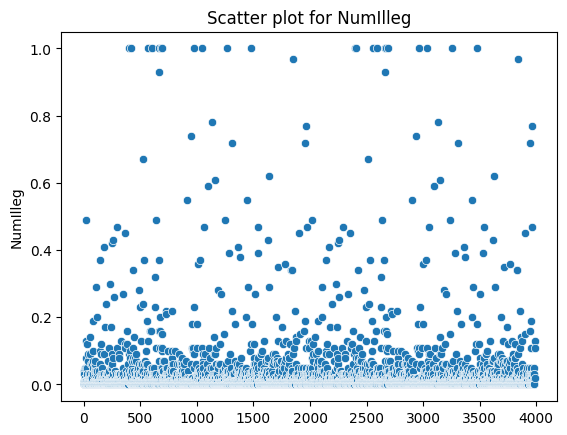

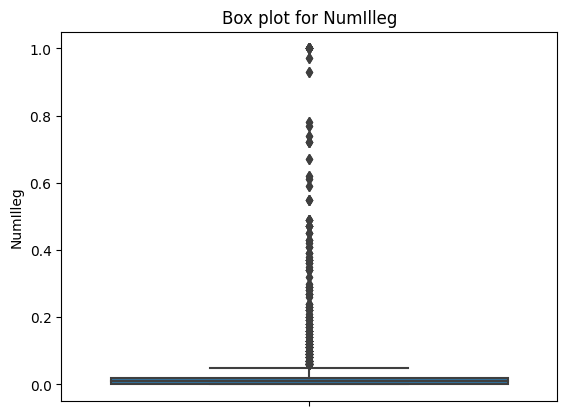

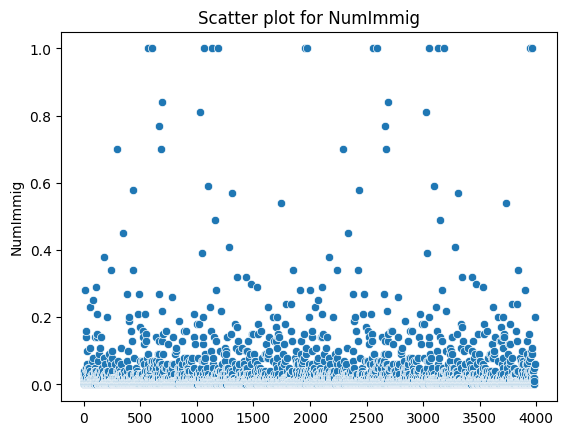

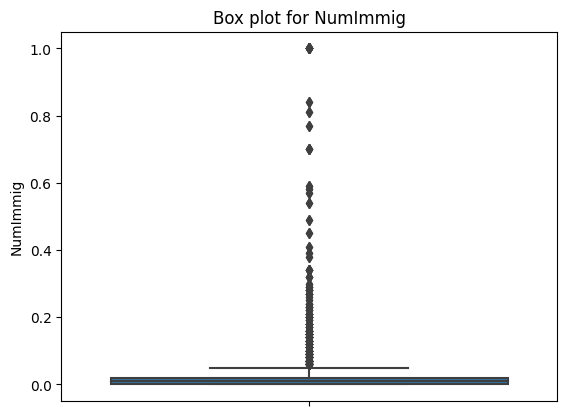

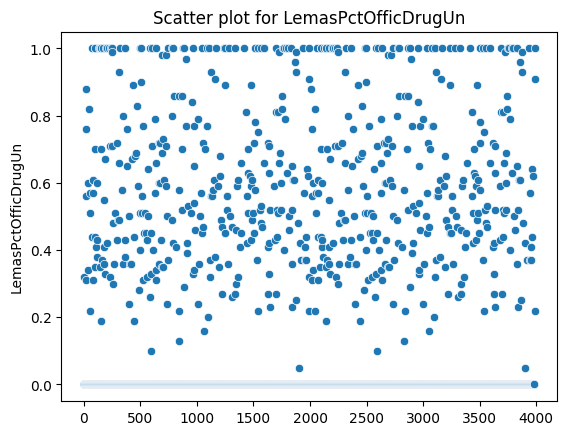

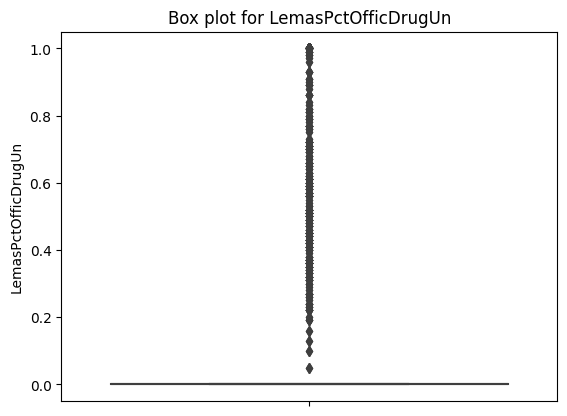

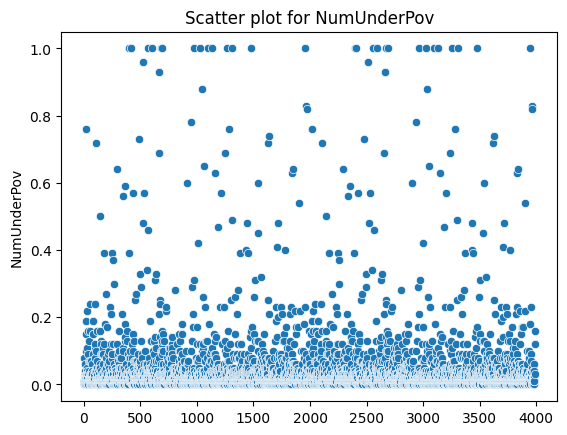

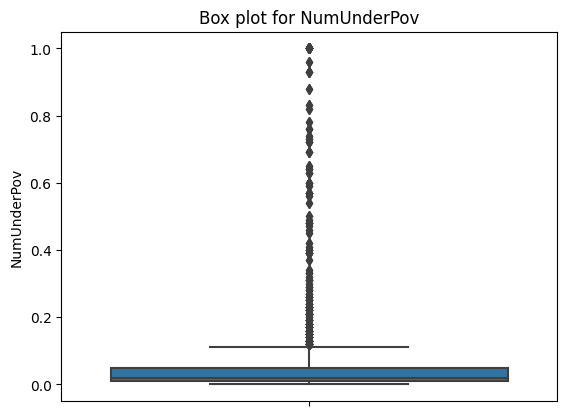

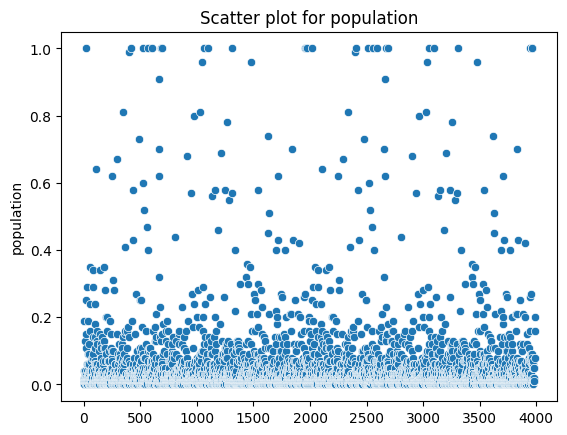

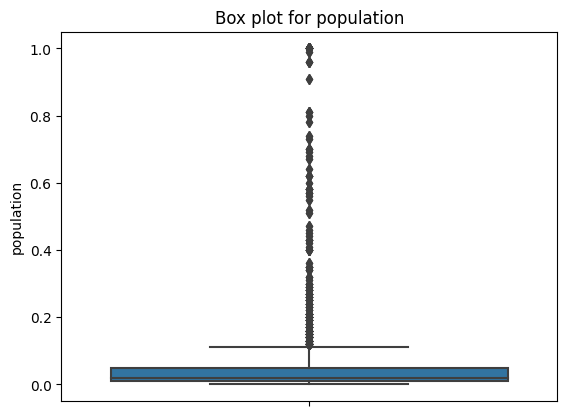

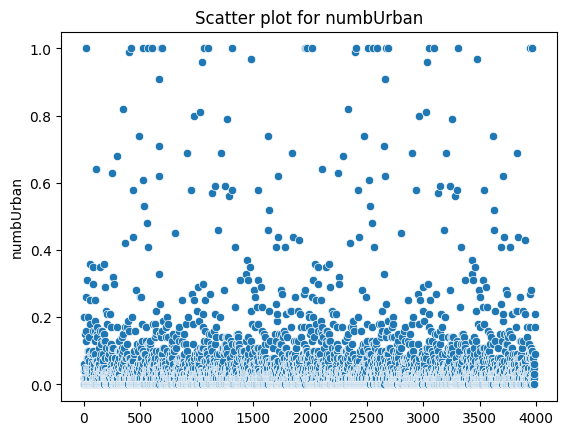

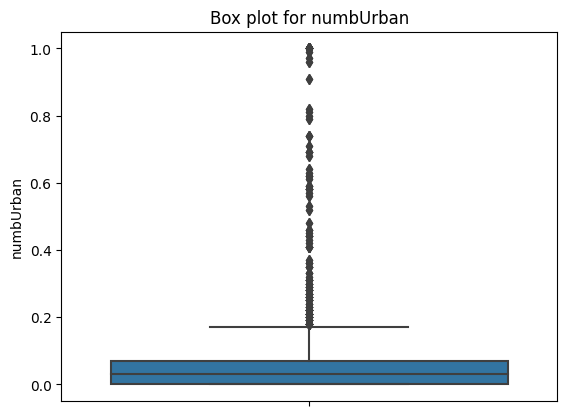

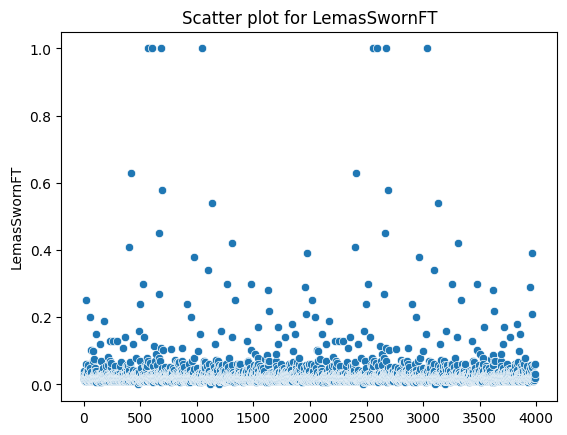

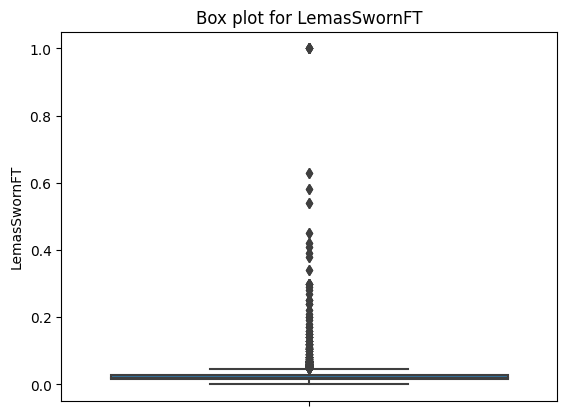

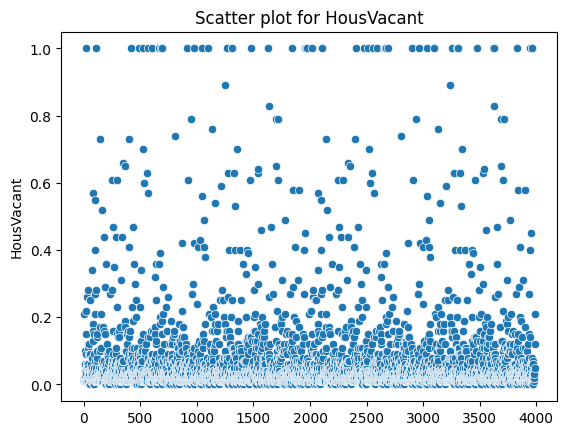

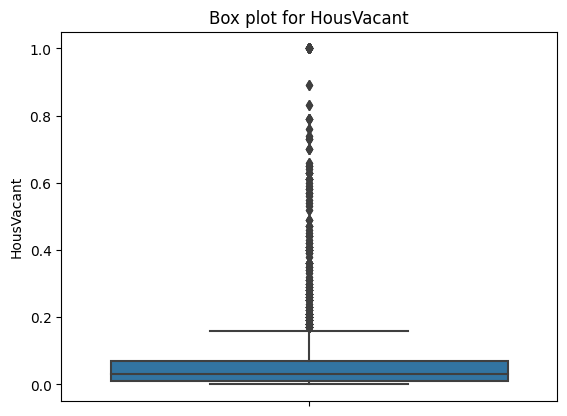

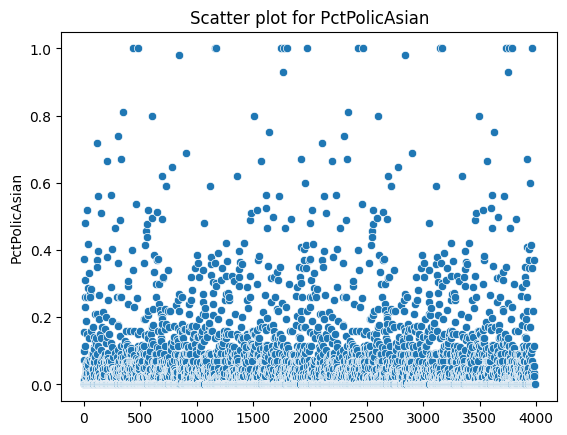

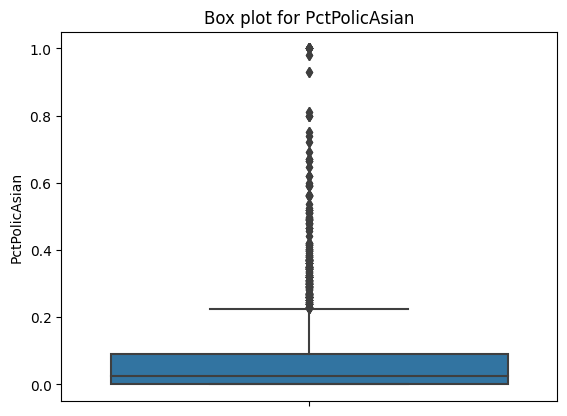

In [49]:
# Select top 11 features with highest CV
top_features = cv.nlargest(11).index

# Scatter plots
for feature in top_features:
    sns.scatterplot(data=df_imputed, x=df_imputed.index, y=feature)
    plt.title(f'Scatter plot for {feature}')
    plt.show()

    # Box plots
    sns.boxplot(data=df_imputed, y=feature)
    plt.title(f'Box plot for {feature}')
    plt.show()




### Answer: Each of these features seem to have a lot of outliers based on the boxplots; however, no conclusions can be drawn about their significance from the scatter plots.

# 2 (f) 


In [51]:
X_train = df_train_imputed.drop(columns = 'ViolentCrimesPerPop')
y_train = df_train_imputed['ViolentCrimesPerPop']

X_test = df_test_imputed.drop(columns = 'ViolentCrimesPerPop')
y_test = df_test_imputed['ViolentCrimesPerPop']


# Create a linear regression object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict target values for the test set
y_pred = model.predict(X_test)

# Calculate the test error (Mean Squared Error)
test_error = mean_squared_error(y_test, y_pred)

print(f"Test Error (MSE): {test_error}")

Test Error (MSE): 0.015518439307413465


# 2 (g)

Fit a ridge regression model on the training set, with
λ
chosen by cross-validation.
Report the test error obtained.



In [52]:



alphas = np.logspace(-6, 6, 1000)  # This will give you values of λ ranging from 1e-6 to 1e6

#cross validation
ridge = RidgeCV(alphas=alphas, store_cv_values=True)
ridge.fit(X_train, y_train)


y_pred = ridge.predict(X_test)
test_error = mean_squared_error(y_test, y_pred)

print(f"Best alpha (lambda): {ridge.alpha_}")
print(f"Test Error (MSE): {test_error}")


Best alpha (lambda): 1.101645949633657
Test Error (MSE): 0.01598458714791773


# 2 (h)


In [53]:

warnings.filterwarnings("ignore")

lasso = LassoCV(cv=5, max_iter=10000)  
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
test_error = mean_squared_error(y_test, y_pred)

selected_features = X_train.columns[lasso.coef_ != 0]  # Features with non-zero coefficients

print(f"Test Error: {test_error}")
print(f"Selected Features (without standardization): {list(selected_features)}")



Test Error: 0.01586523696978977
Selected Features (without standardization): ['racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct65up', 'numbUrban', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWRetire', 'medFamInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctRecentImmig', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVaca

In [54]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_scaled = LassoCV(cv=5)
lasso_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = lasso_scaled.predict(X_test_scaled)
test_error_scaled = mean_squared_error(y_test, y_pred_scaled)

selected_features_scaled = X_train.columns[lasso_scaled.coef_ != 0]

print(f"Test Error (with standardization): {test_error_scaled}")
print(f"Selected Features (with standardization): {list(selected_features_scaled)}")

print(f"Improvement in Test Error after Standardization: {test_error - test_error_scaled}")


Test Error (with standardization): 0.015804871271239467
Selected Features (with standardization): ['racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct65up', 'numbUrban', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWRetire', 'medFamInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec5', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVac

# 2 (i)

In [55]:


# Find the number of components using cross-validation
n_components = X_train.shape[1]
mse_scores = []

for n in range(1, n_components + 1):
    # Create a PCR model with n principal components
    pcr_model = make_pipeline(PCA(n_components=n), LinearRegression())
    
    # Use cross-validation to compute MSE
    scores = -cross_val_score(pcr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    mse_scores.append(np.mean(scores))

# Find the optimal number of components (that gives the lowest MSE)
optimal_components = np.argmin(mse_scores) + 1

# Fit the PCR model with optimal number of components
pcr_optimal = make_pipeline(PCA(n_components=optimal_components), LinearRegression())
pcr_optimal.fit(X_train, y_train)

# Predict and compute test error
y_pred = pcr_optimal.predict(X_test)
test_error = mean_squared_error(y_test, y_pred)

print(f"Optimal number of components: {optimal_components}")
print(f"Test Error (MSE) with optimal components: {test_error}")


Optimal number of components: 110
Test Error (MSE) with optimal components: 0.01566490152496521


# 2 (j)

In [56]:

# Create an XGBRegressor instance
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')

# Define the range for the reg_alpha parameter using np.logspace
alphas = np.logspace(-1, 6, 100)
params = {'reg_alpha': alphas}

# Set up grid search
grid_search = GridSearchCV(xgb_regressor, params, cv=5, scoring='neg_mean_squared_error')

# Fit grid search
grid_search.fit(X_train, y_train)

# Get the best alpha and the best model
best_alpha = grid_search.best_params_['reg_alpha']
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Compute the test error
test_error = mean_squared_error(y_test, y_pred)

# Print the results
print(f"Best alpha: {best_alpha}")
print(f"Test error: {test_error}")


Best alpha: 1.3530477745798069
Test error: 0.002040143394279962
